Coral server (https://github.com/robmarkcole/coral-pi-rest-server) running on [192.168.1.107:5000](192.168.1.107:5000)

In [1]:
# import the necessary packages
import requests
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

from IPython.display import display # to display images

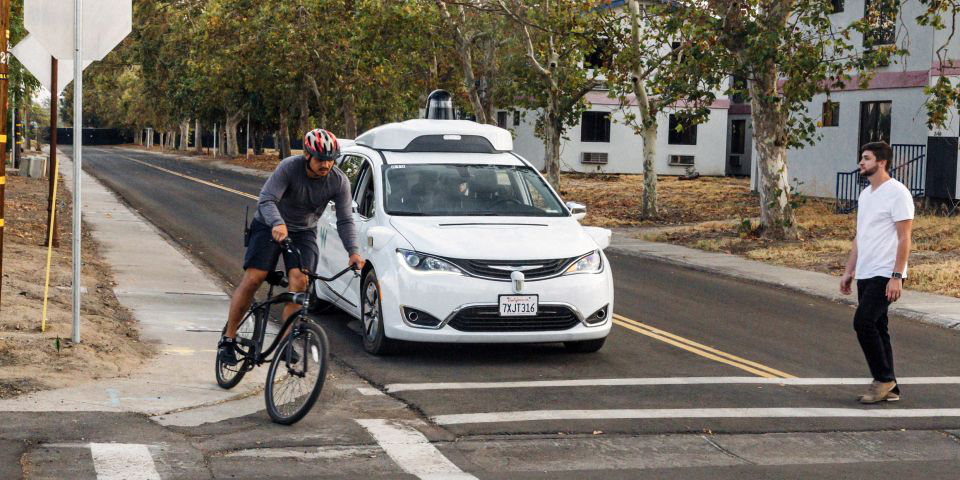

In [2]:
# image_file = "face.jpg" # Returns boxes around random parts of the image
image_file = "people_car.jpg" # returns zero predictions
image = Image.open(image_file)  # PIL img object.
display(image)

In [3]:
image.size

(960, 480)

In [50]:
!curl -X POST -F image=@people_car.jpg 'http://192.168.1.107:5000/predict'

{"predictions":[{"bounding_box":{"x1":0.87,"x2":0.28,"y1":0.96,"y2":0.85},"label":"person","label_id":"0","score":"0.953125"},{"bounding_box":{"x1":0.32,"x2":0.24,"y1":0.64,"y2":0.75},"label":"car","label_id":"2","score":"0.91015625"},{"bounding_box":{"x1":0.24,"x2":0.3,"y1":0.37,"y2":0.78},"label":"person","label_id":"0","score":"0.58203125"},{"bounding_box":{"x1":0.22,"x2":0.44,"y1":0.36,"y2":0.87},"label":"bicycle","label_id":"1","score":"0.26953125"},{"bounding_box":{"x1":0.44,"x2":0.36,"y1":0.47,"y2":0.44},"label":"person","label_id":"0","score":"0.2109375"},{"bounding_box":{"x1":0.37,"x2":0.34,"y1":0.41,"y2":0.43},"label":"person","label_id":"0","score":"0.2109375"},{"bounding_box":{"x1":0.32,"x2":0.31,"y1":0.36,"y2":0.44},"label":"person","label_id":"0","score":"0.2109375"},{"bounding_box":{"x1":0.01,"x2":0.02,"y1":0.02,"y2":0.09},"label":"traffic light","label_id":"9","score":"0.2109375"},{"bounding_box":{"x1":0.25,"x2":0.54,"y1":0.34,"y2":0.85},"label":"bicycle","label_id":"1"

Using requests

In [38]:
CORAL_REST_API_URL = "http://192.168.1.107:5000/predict"
payload = {"image": open(image_file, "rb").read()}
SUCCESS = 200
SERVER_ERROR = 500

# submit the request
response = requests.post(CORAL_REST_API_URL, files=payload)
response.status_code

200

In [51]:
# ensure the request was successful
if response.status_code == SUCCESS:
    predictions = response.json()['predictions']
    
    # loop over the predictions and display them
    for result in predictions:
        print("{}. {}: {}: {}".format(result["label_id"], result["label"], result["score"], result["bounding_box"]))

0. person: 0.953125: {'x1': 0.87, 'x2': 0.28, 'y1': 0.96, 'y2': 0.85}
2. car: 0.91015625: {'x1': 0.32, 'x2': 0.24, 'y1': 0.64, 'y2': 0.75}
0. person: 0.58203125: {'x1': 0.24, 'x2': 0.3, 'y1': 0.37, 'y2': 0.78}
1. bicycle: 0.26953125: {'x1': 0.22, 'x2': 0.44, 'y1': 0.36, 'y2': 0.87}
0. person: 0.2109375: {'x1': 0.44, 'x2': 0.36, 'y1': 0.47, 'y2': 0.44}
0. person: 0.2109375: {'x1': 0.37, 'x2': 0.34, 'y1': 0.41, 'y2': 0.43}
0. person: 0.2109375: {'x1': 0.32, 'x2': 0.31, 'y1': 0.36, 'y2': 0.44}
9. traffic light: 0.2109375: {'x1': 0.01, 'x2': 0.02, 'y1': 0.02, 'y2': 0.09}
1. bicycle: 0.16015625: {'x1': 0.25, 'x2': 0.54, 'y1': 0.34, 'y2': 0.85}
0. person: 0.16015625: {'x1': 0.31, 'x2': 0.32, 'y1': 0.37, 'y2': 0.62}


## Draw bounging boxes - to fix

In [59]:
draw = ImageDraw.Draw(image)

In [60]:
help(draw.rectangle)

Help on method rectangle in module PIL.ImageDraw:

rectangle(xy, fill=None, outline=None, width=0) method of PIL.ImageDraw.ImageDraw instance
    Draw a rectangle.



In [61]:
for result in predictions:
    b_box = result["bounding_box"]
    print (result["label"], b_box)
    bounding_box = [(b_box['x1'], b_box['y1']), (b_box['x2'], b_box['y2'])]
    # box = bounding_box.flatten().tolist()
    draw.rectangle(bounding_box, outline='red')

person {'x1': 0.87, 'x2': 0.28, 'y1': 0.96, 'y2': 0.85}
car {'x1': 0.32, 'x2': 0.24, 'y1': 0.64, 'y2': 0.75}
person {'x1': 0.24, 'x2': 0.3, 'y1': 0.37, 'y2': 0.78}
bicycle {'x1': 0.22, 'x2': 0.44, 'y1': 0.36, 'y2': 0.87}
person {'x1': 0.44, 'x2': 0.36, 'y1': 0.47, 'y2': 0.44}
person {'x1': 0.37, 'x2': 0.34, 'y1': 0.41, 'y2': 0.43}
person {'x1': 0.32, 'x2': 0.31, 'y1': 0.36, 'y2': 0.44}
traffic light {'x1': 0.01, 'x2': 0.02, 'y1': 0.02, 'y2': 0.09}
bicycle {'x1': 0.25, 'x2': 0.54, 'y1': 0.34, 'y2': 0.85}
person {'x1': 0.31, 'x2': 0.32, 'y1': 0.37, 'y2': 0.62}


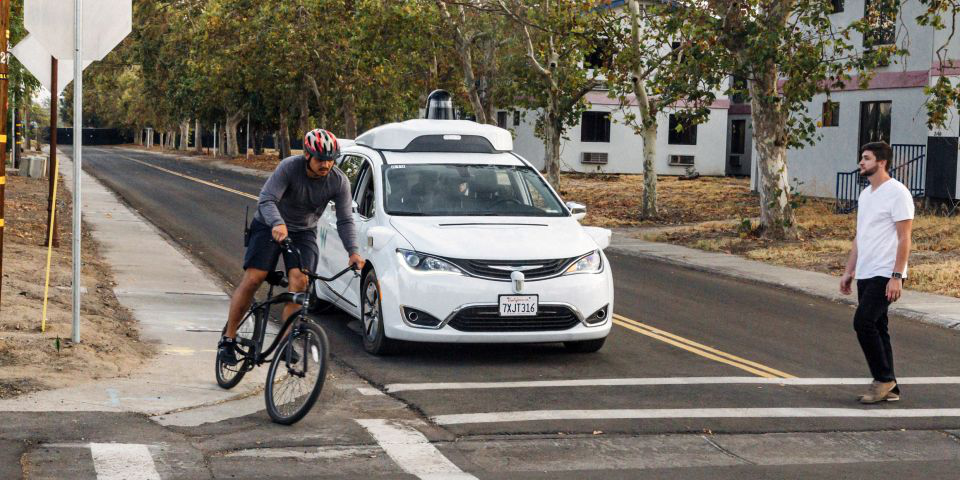

In [62]:
display(image)